Regression in Machine Learning involves predicting continuous values. 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv('movie_data.csv')

In [90]:
df.head()

,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,num_user_for_reviews,language,country,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


# Problem Statement

This project sets off to predict **imdb_score** of a movie given a set of features

In [91]:
movie = df.copy()

# Data Preprocessing

In [92]:
movie.head()

,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,num_user_for_reviews,language,country,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


In [93]:
movie.rename(columns={'director_name':'director','actor_2_name':'actor_2',
                   'actor_1_name':'actor_1','movie_title':'title','num_voted_users':'voters',
                  'actor_3_name':'actor_3','num_user_for_reviews':'reviewers',
                  'title_year':'year'},inplace=True)

In [94]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   director         4939 non-null   object 
 1   duration         5028 non-null   float64
 2   actor_2          5030 non-null   object 
 3   genres           5043 non-null   object 
 4   actor_1          5036 non-null   object 
 5   title            5043 non-null   object 
 6   voters           5043 non-null   int64  
 7   actor_3          5020 non-null   object 
 8   movie_imdb_link  5043 non-null   object 
 9   reviewers        5022 non-null   float64
 10  language         5031 non-null   object 
 11  country          5038 non-null   object 
 12  year             4935 non-null   float64
 13  imdb_score       5043 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 551.7+ KB


## Missing Values

In [95]:
movie = movie[movie.notna().all(axis=1)].reset_index(drop=True)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   director         4884 non-null   object 
 1   duration         4884 non-null   float64
 2   actor_2          4884 non-null   object 
 3   genres           4884 non-null   object 
 4   actor_1          4884 non-null   object 
 5   title            4884 non-null   object 
 6   voters           4884 non-null   int64  
 7   actor_3          4884 non-null   object 
 8   movie_imdb_link  4884 non-null   object 
 9   reviewers        4884 non-null   float64
 10  language         4884 non-null   object 
 11  country          4884 non-null   object 
 12  year             4884 non-null   float64
 13  imdb_score       4884 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 534.3+ KB


In [96]:
movie

,director,duration,actor_2,genres,actor_1,title,voters,actor_3,movie_imdb_link,reviewers,language,country,year,imdb_score
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5
4,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,2012.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,Edward Burns,95.0,Caitlin FitzGerald,Comedy|Drama,Kerry Bishé,Newlyweds,1338,Daniella Pineda,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,2011.0,6.4
4880,Scott Smith,87.0,Daphne Zuniga,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,Crystal Lowe,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,2013.0,7.7
4881,Benjamin Roberds,76.0,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,2013.0,6.3
4882,Daniel Hsia,100.0,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,2012.0,6.3


In [97]:
genres = [genre.split('|') for genre in movie.genres]
all_genres = []
for genre in genres:
    all_genres.extend(genre)  
for genre in set(all_genres):
    movie[genre] = movie.genres.apply(lambda x: genre in x).astype(int)

In [98]:
pd.set_option('display.max_columns',100)
movie.head()

,director,duration,actor_2,genres,actor_1,title,voters,actor_3,movie_imdb_link,reviewers,language,country,year,imdb_score,Mystery,News,Horror,War,Adventure,Short,Fantasy,Biography,Documentary,Western,Sport,Crime,History,Music,Film-Noir,Comedy,Thriller,Romance,Sci-Fi,Action,Family,Musical,Drama,Animation
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,2012.0,6.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [99]:
movie.shape

(4884, 38)

In [100]:
def encode(column):
    top_10 = movie[column].value_counts()[:10].index
    for val in top_10:
        movie[column+'_'+val] = (movie[column]==val).astype(int)

In [101]:
to_encode = ['director','actor_2','actor_1','actor_3','language','country']
for column in to_encode:
    encode(column)

In [102]:
movie.shape

(4884, 98)

In [103]:
movie.head()

,director,duration,actor_2,genres,actor_1,title,voters,actor_3,movie_imdb_link,reviewers,language,country,year,imdb_score,Mystery,News,Horror,War,Adventure,Short,Fantasy,Biography,Documentary,Western,Sport,Crime,History,Music,Film-Noir,Comedy,Thriller,Romance,Sci-Fi,Action,Family,Musical,Drama,Animation,director_Steven Spielberg,director_Woody Allen,director_Martin Scorsese,director_Clint Eastwood,director_Ridley Scott,director_Tim Burton,director_Spike Lee,director_Steven Soderbergh,director_Renny Harlin,director_Oliver Stone,actor_2_Morgan Freeman,actor_2_Charlize Theron,actor_2_Brad Pitt,actor_2_Meryl Streep,actor_2_James Franco,actor_2_Adam Sandler,actor_2_Jason Flemyng,actor_2_Robert Duvall,actor_2_Judy Greer,actor_2_Steve Buscemi,actor_1_Robert De Niro,actor_1_Johnny Depp,actor_1_Nicolas Cage,actor_1_J.K. Simmons,actor_1_Bruce Willis,actor_1_Denzel Washington,actor_1_Liam Neeson,actor_1_Matt Damon,actor_1_Steve Buscemi,actor_1_Harrison Ford,actor_3_Ben Mendelsohn,actor_3_Steve Coogan,actor_3_John Heard,actor_3_Anne Hathaway,actor_3_Sam Shepard,actor_3_Robert Duvall,actor_3_Lois Maxwell,actor_3_Stephen Root,actor_3_Jon Gries,actor_3_Kirsten Dunst,language_English,language_French,language_Spanish,language_Hindi,language_Mandarin,language_German,language_Japanese,language_Cantonese,language_Russian,language_Italian,country_USA,country_UK,country_France,country_Canada,country_Germany,country_Australia,country_Spain,country_India,country_China,country_Japan
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,2012.0,6.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [104]:
data = movie.drop(columns=['director','actor_2','genres','actor_1','title','actor_3',
                           'movie_imdb_link','language','country'])
data.head()

,duration,voters,reviewers,year,imdb_score,Mystery,News,Horror,War,Adventure,Short,Fantasy,Biography,Documentary,Western,Sport,Crime,History,Music,Film-Noir,Comedy,Thriller,Romance,Sci-Fi,Action,Family,Musical,Drama,Animation,director_Steven Spielberg,director_Woody Allen,director_Martin Scorsese,director_Clint Eastwood,director_Ridley Scott,director_Tim Burton,director_Spike Lee,director_Steven Soderbergh,director_Renny Harlin,director_Oliver Stone,actor_2_Morgan Freeman,actor_2_Charlize Theron,actor_2_Brad Pitt,actor_2_Meryl Streep,actor_2_James Franco,actor_2_Adam Sandler,actor_2_Jason Flemyng,actor_2_Robert Duvall,actor_2_Judy Greer,actor_2_Steve Buscemi,actor_1_Robert De Niro,actor_1_Johnny Depp,actor_1_Nicolas Cage,actor_1_J.K. Simmons,actor_1_Bruce Willis,actor_1_Denzel Washington,actor_1_Liam Neeson,actor_1_Matt Damon,actor_1_Steve Buscemi,actor_1_Harrison Ford,actor_3_Ben Mendelsohn,actor_3_Steve Coogan,actor_3_John Heard,actor_3_Anne Hathaway,actor_3_Sam Shepard,actor_3_Robert Duvall,actor_3_Lois Maxwell,actor_3_Stephen Root,actor_3_Jon Gries,actor_3_Kirsten Dunst,language_English,language_French,language_Spanish,language_Hindi,language_Mandarin,language_German,language_Japanese,language_Cantonese,language_Russian,language_Italian,country_USA,country_UK,country_France,country_Canada,country_Germany,country_Australia,country_Spain,country_India,country_China,country_Japan
0,178.0,886204,3054.0,2009.0,7.9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,169.0,471220,1238.0,2007.0,7.1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,148.0,275868,994.0,2015.0,6.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,164.0,1144337,2701.0,2012.0,8.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,132.0,212204,738.0,2012.0,6.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [105]:
y = data.imdb_score
X = data.drop(columns='imdb_score')

# Data Splitting

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Modelling

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [115]:
predictions = model.predict(X_test)

In [118]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,predictions)

0.7561834561834562

In [120]:
predictions[:10]

array([6.9, 6.3, 6.4, 7.4, 6.1, 4.6, 6.5, 6.7, 8.3, 4.6])

In [122]:
list(y_test[:10])

[6.3, 6.4, 7.8, 8.1, 6.3, 4.7, 6.1, 6.4, 8.4, 3.0]

In [135]:
imps = sorted(zip(model.feature_importances_,X_train.columns),reverse=True)
x_axis = [imp[0] for imp in imps][:20]
y_axis = [imp[1] for imp in imps][:20]

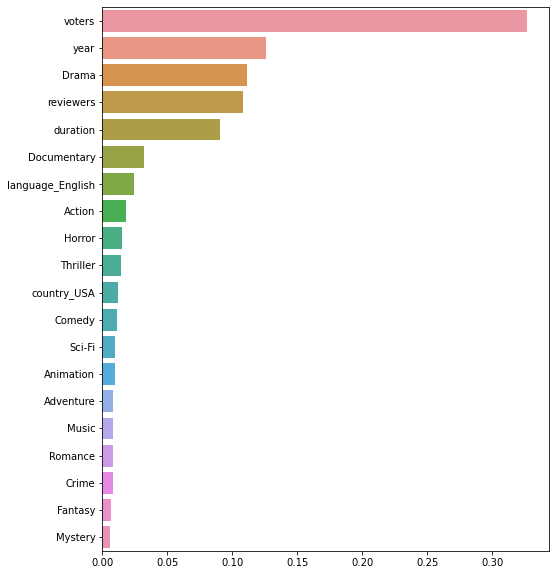

In [136]:
plt.figure(figsize=(8,10))
sns.barplot(x=x_axis,y=y_axis);